
# <br/><br/><br/> Comparison of lithological facies prediction results using different machine learning methods

### *Fan Xia*

#### Last edited on 07/26/22 by Fan X.

### Introduction
#### Compare lithological facies prediction results using SVM, KNN and RF method with the ground truth.

In [3]:
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

### Load true result from disk

In [5]:
filename = './data/blind_stuart_crawford_core_facies.csv'
true_data = pd.read_csv(filename)
true_data.rename(columns = {'WellName': 'Well Name', 'Depth.ft': 'Depth', 'LithCode': 'Facies'}, inplace = True)
true_data

,Well Name,Depth,Facies,LithLabel
0,STUART,2807.5,3,NM Shly Silt
1,STUART,2808.0,3,NM Shly Silt
2,STUART,2808.5,3,NM Shly Silt
3,STUART,2809.0,3,NM Shly Silt
4,STUART,2809.5,3,NM Shly Silt
...,...,...,...,...
884,CRAWFORD,3193.5,6,Wackestone
885,CRAWFORD,3194.0,6,Wackestone
886,CRAWFORD,3194.5,6,Wackestone
887,CRAWFORD,3195.0,6,Wackestone


### QC range of true result and clean

In [6]:
print('Facies range: %s %s' % (true_data['Facies'].min(), true_data['Facies'].max()))

Facies range: 1 11


In [7]:
true_data = true_data[true_data['Facies'] <= 9]
true_data

,Well Name,Depth,Facies,LithLabel
0,STUART,2807.5,3,NM Shly Silt
1,STUART,2808.0,3,NM Shly Silt
2,STUART,2808.5,3,NM Shly Silt
3,STUART,2809.0,3,NM Shly Silt
4,STUART,2809.5,3,NM Shly Silt
...,...,...,...,...
884,CRAWFORD,3193.5,6,Wackestone
885,CRAWFORD,3194.0,6,Wackestone
886,CRAWFORD,3194.5,6,Wackestone
887,CRAWFORD,3195.0,6,Wackestone


In [8]:
print('Facies range: %s %s' % (true_data['Facies'].min(), true_data['Facies'].max()))

Facies range: 1 9


In [9]:
true_stuart = true_data[true_data['Well Name'] == 'STUART']
depth_min = true_stuart['Depth'].min()
depth_max = true_stuart['Depth'].max()
n_depth = int(2 * (depth_max - depth_min)) + 1
print(depth_min, depth_max, n_depth)

2807.5 3046.5 479


In [10]:
true_crawford = true_data[true_data['Well Name'] == 'CRAWFORD']
depth_min = true_crawford['Depth'].min()
depth_max = true_crawford['Depth'].max()
n_depth = int(2 * (depth_max - depth_min)) + 1
print(depth_min, depth_max, n_depth)

2973.0 3195.5 446


### Load predict results of different machine learning methods

In [11]:
# Load SVM predict result from disk
filename = './data/result_svm.csv'
svm_data = pd.read_csv(filename)
svm_data

,Unnamed: 0,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Predict
0,0,A1 SH,STUART,2808.0,66.276,0.630,3.300,10.650,3.591,1,1.000,3
1,1,A1 SH,STUART,2808.5,77.252,0.585,6.500,11.950,3.341,1,0.978,3
2,2,A1 SH,STUART,2809.0,82.899,0.566,9.400,13.600,3.064,1,0.956,3
3,3,A1 SH,STUART,2809.5,80.671,0.593,9.500,13.250,2.977,1,0.933,3
4,4,A1 SH,STUART,2810.0,75.971,0.638,8.700,12.350,3.020,1,0.911,1
...,...,...,...,...,...,...,...,...,...,...,...,...
825,825,C SH,CRAWFORD,3158.5,86.078,0.554,5.040,16.150,3.161,1,0.639,3
826,826,C SH,CRAWFORD,3159.0,88.855,0.539,5.560,16.750,3.118,1,0.611,3
827,827,C SH,CRAWFORD,3159.5,90.490,0.530,6.360,16.780,3.168,1,0.583,3
828,828,C SH,CRAWFORD,3160.0,90.975,0.522,7.035,16.995,3.154,1,0.556,3


In [12]:
svm_stuart = svm_data[svm_data['Well Name'] == 'STUART']
depth_min = svm_stuart['Depth'].min()
depth_max = svm_stuart['Depth'].max()
n_depth = int(2 * (depth_max - depth_min)) + 1
print(depth_min, depth_max, n_depth)

2808.0 3044.5 474


In [13]:
svm_crawford = svm_data[svm_data['Well Name'] == 'CRAWFORD']
depth_min = svm_crawford['Depth'].min()
depth_max = svm_crawford['Depth'].max()
n_depth = int(2 * (depth_max - depth_min)) + 1
print(depth_min, depth_max, n_depth)

2972.5 3160.5 377


In [14]:
# Find difference of depth between two dataframe
true_data_depth = true_data[['Well Name', 'Depth']]
svm_data_depth = svm_data[['Well Name', 'Depth']]
print(len(true_data_depth), len(svm_data_depth))

880 830


In [15]:
diff = true_data_depth.merge(svm_data_depth, indicator=True, how='outer')

In [16]:
diff[(diff['_merge'] == 'left_only') & (diff['Well Name'] == 'STUART')]

,Well Name,Depth,_merge
0,STUART,2807.5,left_only
463,STUART,3045.0,left_only
464,STUART,3045.5,left_only
465,STUART,3046.0,left_only
466,STUART,3046.5,left_only


In [17]:
diff[(diff['_merge'] == 'right_only') & (diff['Well Name'] == 'STUART')]

,Well Name,Depth,_merge
880,STUART,2816.0,right_only
881,STUART,2824.0,right_only
882,STUART,2881.0,right_only
883,STUART,2906.0,right_only
884,STUART,2952.5,right_only
885,STUART,2958.5,right_only
886,STUART,2964.0,right_only
887,STUART,2971.0,right_only
888,STUART,2978.5,right_only
889,STUART,2983.5,right_only


In [18]:
diff[(diff['_merge'] == 'left_only') & (diff['Well Name'] == 'CRAWFORD')]

,Well Name,Depth,_merge
561,CRAWFORD,3023.0,left_only
562,CRAWFORD,3023.5,left_only
726,CRAWFORD,3117.5,left_only
727,CRAWFORD,3118.0,left_only
728,CRAWFORD,3118.5,left_only
...,...,...,...
875,CRAWFORD,3193.5,left_only
876,CRAWFORD,3194.0,left_only
877,CRAWFORD,3194.5,left_only
878,CRAWFORD,3195.0,left_only


In [19]:
diff[(diff['_merge'] == 'right_only') & (diff['Well Name'] == 'CRAWFORD')]

,Well Name,Depth,_merge
892,CRAWFORD,2972.5,right_only
893,CRAWFORD,2977.0,right_only
894,CRAWFORD,3008.5,right_only
895,CRAWFORD,3009.0,right_only
896,CRAWFORD,3009.5,right_only
897,CRAWFORD,3010.0,right_only
898,CRAWFORD,3010.5,right_only
899,CRAWFORD,3032.0,right_only
900,CRAWFORD,3032.5,right_only
901,CRAWFORD,3035.5,right_only


In [20]:
# Load KNN predict result from disk
filename = './data/result_knn.csv'
knn_data = pd.read_csv(filename)
knn_data

,Unnamed: 0,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Predict
0,0,A1 SH,STUART,2808.0,66.276,0.630,3.300,10.650,3.591,1,1.000,3
1,1,A1 SH,STUART,2808.5,77.252,0.585,6.500,11.950,3.341,1,0.978,3
2,2,A1 SH,STUART,2809.0,82.899,0.566,9.400,13.600,3.064,1,0.956,3
3,3,A1 SH,STUART,2809.5,80.671,0.593,9.500,13.250,2.977,1,0.933,2
4,4,A1 SH,STUART,2810.0,75.971,0.638,8.700,12.350,3.020,1,0.911,3
...,...,...,...,...,...,...,...,...,...,...,...,...
825,825,C SH,CRAWFORD,3158.5,86.078,0.554,5.040,16.150,3.161,1,0.639,3
826,826,C SH,CRAWFORD,3159.0,88.855,0.539,5.560,16.750,3.118,1,0.611,3
827,827,C SH,CRAWFORD,3159.5,90.490,0.530,6.360,16.780,3.168,1,0.583,3
828,828,C SH,CRAWFORD,3160.0,90.975,0.522,7.035,16.995,3.154,1,0.556,3


In [21]:
# Load RFC predict result from disk
filename = './data/result_rfc.csv'
rfc_data = pd.read_csv(filename)
rfc_data

,Unnamed: 0,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Predict
0,0,A1 SH,STUART,2808.0,66.276,0.630,3.300,10.650,3.591,1,1.000,3
1,1,A1 SH,STUART,2808.5,77.252,0.585,6.500,11.950,3.341,1,0.978,3
2,2,A1 SH,STUART,2809.0,82.899,0.566,9.400,13.600,3.064,1,0.956,2
3,3,A1 SH,STUART,2809.5,80.671,0.593,9.500,13.250,2.977,1,0.933,2
4,4,A1 SH,STUART,2810.0,75.971,0.638,8.700,12.350,3.020,1,0.911,3
...,...,...,...,...,...,...,...,...,...,...,...,...
825,825,C SH,CRAWFORD,3158.5,86.078,0.554,5.040,16.150,3.161,1,0.639,3
826,826,C SH,CRAWFORD,3159.0,88.855,0.539,5.560,16.750,3.118,1,0.611,3
827,827,C SH,CRAWFORD,3159.5,90.490,0.530,6.360,16.780,3.168,1,0.583,3
828,828,C SH,CRAWFORD,3160.0,90.975,0.522,7.035,16.995,3.154,1,0.556,3


### Prepare results for comparison

In [22]:
true_data_compare = true_data[['Well Name', 'Depth', 'Facies']]

svm_data_compare = svm_data[['Well Name', 'Depth', 'Predict']]
svm_data_compare.rename(columns = {'Predict': 'SVM'}, inplace = True)

knn_data_compare = knn_data[['Well Name', 'Depth', 'Predict']]
knn_data_compare.rename(columns = {'Predict': 'KNN'}, inplace = True)

rfc_data_compare = rfc_data[['Well Name', 'Depth', 'Predict']]
rfc_data_compare.rename(columns = {'Predict': 'RFC'}, inplace = True)

print(len(true_data_compare), len(svm_data_compare), len(knn_data_compare), len(rfc_data_compare))

880 830 830 830


C:\Users\fxia\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [23]:
results = true_data_compare.merge(svm_data_compare, indicator=False, how='inner')
results = results.merge(knn_data_compare, indicator=False, how='left')
results = results.merge(rfc_data_compare, indicator=False, how='left')
results

,Well Name,Depth,Facies,SVM,KNN,RFC
0,STUART,2808.0,3,3,3,3
1,STUART,2808.5,3,3,3,3
2,STUART,2809.0,3,3,3,2
3,STUART,2809.5,3,3,2,2
4,STUART,2810.0,3,1,3,3
...,...,...,...,...,...,...
795,CRAWFORD,3158.5,2,3,3,3
796,CRAWFORD,3159.0,2,3,3,3
797,CRAWFORD,3159.5,2,3,3,3
798,CRAWFORD,3160.0,2,3,3,3


### Plot results for comparison

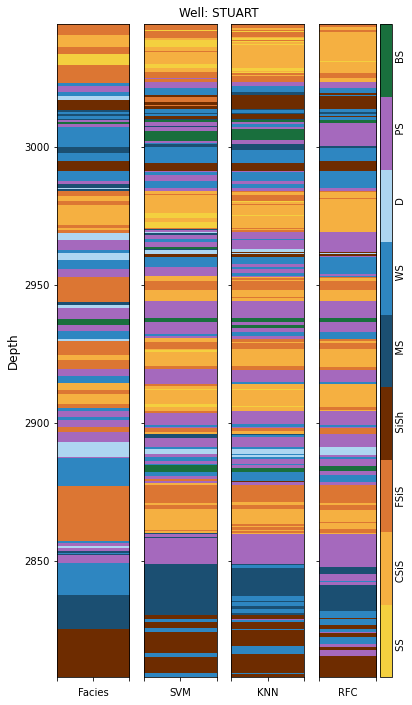

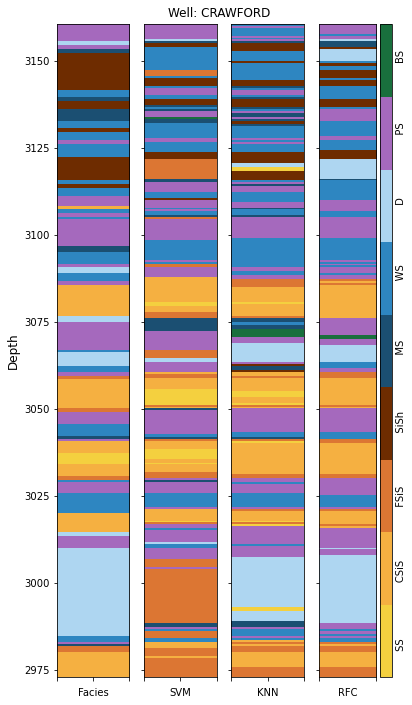

In [24]:
# Plot clean dataset
# SS - nonmarine sandstone   CSiS - nonmarine coarse siltstone   FSis - nonmarine fine siltstone
# SiSh - marine siltstone and shale   MS - mudstone (limestone)   WS - wackestone (limestone)
# D - dolomite   PS - packstone (limestone)   BS - bafflestone (limestone)
facies_labels = [' SS ', 'CSiS', 'FSiS', 'SiSh', ' MS ', ' WS ', ' D  ', ' PS ', ' BS ']
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00', '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

plot_data(results[results['Well Name'] == 'STUART'], ['Facies', 'SVM', 'KNN', 'RFC'], facies_labels, facies_colors)
plot_data(results[results['Well Name'] == 'CRAWFORD'], ['Facies', 'SVM', 'KNN', 'RFC'], facies_labels, facies_colors)

In [25]:
from sklearn.metrics import confusion_matrix

result_STUART = results[results['Well Name'] == 'STUART']
cm_STUART = confusion_matrix(result_STUART['Facies'], result_STUART['SVM'])

result_CRAWFORD = results[results['Well Name'] == 'CRAWFORD']
cm_CRAWFORD = confusion_matrix(result_CRAWFORD['Facies'], result_CRAWFORD['SVM'])

In [26]:
facies_neighbors = [[2], [1, 3], [2], [5], [4, 6], [5, 7, 8], [6, 8], [6, 7, 9], [7, 8]]

ml_methods = ['SVM', 'KNN', 'RFC']

cm_STUART = {}
cm_CRAWFORD = {}

n_method = len(ml_methods)
n_accuracy = 2
n_score = n_method * n_accuracy
score_STUART = np.zeros(n_score).reshape(n_accuracy, n_method)
score_CRAWFORD = np.zeros(n_score).reshape(n_accuracy, n_method)

for i, method in enumerate(ml_methods):
    cm_STUART[i] = confusion_matrix(result_STUART['Facies'], result_STUART[method])
    cm_CRAWFORD[i] = confusion_matrix(result_CRAWFORD['Facies'], result_CRAWFORD[method])
    score_STUART[0][i] = accuracy(cm_STUART[i])
    score_STUART[1][i] = accuracy_adj(cm_STUART[i], facies_neighbors)
    score_CRAWFORD[0][i] = accuracy(cm_CRAWFORD[i])
    score_CRAWFORD[1][i] = accuracy_adj(cm_CRAWFORD[i], facies_neighbors)

In [27]:
for i, method in enumerate(ml_methods):
    print('STUART', method, score_STUART[0][i], score_STUART[1][i])

print('')
for i, method in enumerate(ml_methods):
    print('CRAWFORD', method, score_CRAWFORD[0][i], score_CRAWFORD[1][i])

STUART SVM 0.43722943722943725 0.8376623376623377
STUART KNN 0.45454545454545453 0.8722943722943723
STUART RFC 0.487012987012987 0.9004329004329005

CRAWFORD SVM 0.378698224852071 0.6597633136094675
CRAWFORD KNN 0.5118343195266272 0.8106508875739645
CRAWFORD RFC 0.591715976331361 0.8254437869822485


Text(0.5, 1.1, 'Accuracy comparison with ML methods')

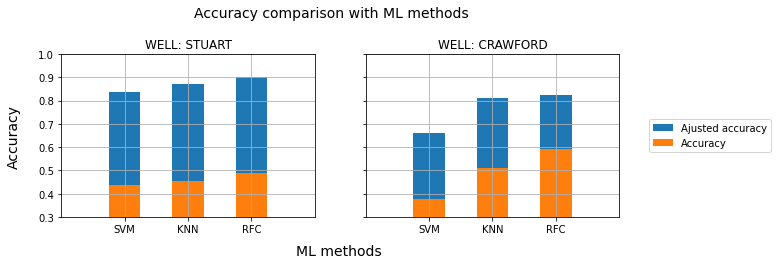

In [28]:
fig, axes = plt.subplots(1, 2, sharex = 'col', sharey = 'row', figsize = (10, 3))

ax = axes[0]

ax.bar(ml_methods, score_STUART[1], width = 0.5, label = 'Ajusted accuracy')
ax.bar(ml_methods, score_STUART[0], width = 0.5, label = 'Accuracy')
ax.set_title('WELL: STUART', fontsize = 12)
ax.set_ylim([0.3, 1.0])
ax.grid()
ax.margins(0.3, 1)

ax = axes[1]

ax.bar(ml_methods, score_CRAWFORD[1], width = 0.5, label = 'Ajusted accuracy')
ax.bar(ml_methods, score_CRAWFORD[0], width = 0.5, label = 'Accuracy')
ax.set_title('WELL: CRAWFORD', fontsize = 12)
ax.set_ylim([0.3, 1.0])
ax.grid()
ax.margins(0.3, 1)

ax.legend(bbox_to_anchor = (1.6, 0.5), loc = 'center right', borderaxespad = 0.)
fig.text(0.51, -0.05, 'ML methods', ha = 'center', fontsize = 14)
fig.text(0.05, 0.5, 'Accuracy', va = 'center', rotation = 'vertical', fontsize = 14)

fig.suptitle('Accuracy comparison with ML methods', fontsize = 14, y = 1.1)


### Supplemental functions

In [1]:
# This function plots log dataset
# Arguments:
#     data      input clean dataset
#     vars      input variables to compare (e.g. ['Facies', 'Predictions'])
#     label     input facies names
#     color     input facies colors
def plot_data(data, vars, label, color):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    
    data = data.sort_values(by = 'Depth')
    cmap = colors.ListedColormap(color[0:len(color)], 'indexed')
    
    zmin = data.Depth.min()
    zmax = data.Depth.max()
    
    panel = {}
    for i, var in enumerate(vars):
        panel[i] = np.repeat(np.expand_dims(data[var].values, 1), 100, 1)
        
    m = 0
    nvars = len(vars)
    
    f, ax = plt.subplots(nrows = 1, ncols = m + nvars, figsize = [2 + nvars, 12])
    
    im = {}
    for i in range(nvars):
        im[i] = ax[m + i].imshow(panel[i], extent=[0, 100, zmin, zmax], interpolation = 'none',
                                 aspect = 'auto', cmap = cmap, vmin = 1, vmax = 9)
    
    legend = make_axes_locatable(ax[m + nvars - 1])
    cax = legend.append_axes('right', size = '20%', pad = 0.05)
    cbar = plt.colorbar(im[0], cax = cax)
    cbar.set_label((17*' ').join(label))
    cbar.set_ticks(range(0, 1))
    cbar.set_ticklabels('')
    
    for i, var in enumerate(vars):
        ax[m + i].set_xlabel(var)
        ax[m + i].set_xticklabels([])
        if i + 1 < nvars: ax[i + 1].set_yticklabels([])
        
    ax[0].set_ylabel('Depth', fontsize = 12)
    
    f.suptitle('Well: %s' % data['Well Name'].unique()[0], fontsize = 12, y = 0.9)

In [2]:
# This function returns the classification accuracy
# The accuracy is defined as the number of correct classification divided by the total number of classifications
# Arguments:
#     cm       input confusion matrix
def accuracy(cm):
    n_correct = 0.0
    n_class = cm.shape[0]
    for i in np.arange(0, n_class):
        n_correct += cm[i][i]
    result = n_correct/sum(sum(cm))
    return result

# This function returns the adjusted classification accuracy
# The accuracy is defined as the number of correct classification divided by the total number of classifications
# Arguments:
#     cm       input confusion matrix
#     adj      adjacent facies
def accuracy_adj(cm, adj):
    n_correct = 0.0
    n_class = cm.shape[0]
    for i in np.arange(0, n_class):
        n_correct += cm[i][i]
        for j in adj[i]:
            if j - 1 < n_class: n_correct += cm[i][j - 1]
    result = n_correct/sum(sum(cm))
    return result